## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [2]:
# Nothing to do here

In [3]:
%%nose
def test_default():
  assert True

1/1 tests passed


## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [4]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [5]:
%%nose
def test_colors_exists():
    assert 'colors' in globals(), "You should read the data into a variable named `colors`"

1/1 tests passed


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [6]:
# How many distinct colors are available?


In [7]:
num_colors = len(colors['rgb'])
print(num_colors)

135


In [8]:
%%nose
def test_num_colors():
    assert num_colors == 135, "The variable num_colors should equal 135"

1/1 tests passed


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [9]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()
colors_summary


,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [10]:
%%nose
def test_colors_summary_exists():
    assert 'colors_summary' in globals(), "You should have defined a variable named `colors_summary`"
def test_colors_summary():
    assert colors_summary.shape == (2, 3), "The DataFrame colors_summary should contain 2 rows and 3 columns"

2/2 tests passed


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

      theme_id  num_parts
year                     
1950     371.0        7.0
1953     371.0        8.5
1954     371.0        5.0
1955     371.0       20.0
1956     371.0        5.5
1957     372.0       20.0
1958     371.0       21.0
1959     371.0       21.0
1960     497.0       50.0
1961     371.0       18.0
1962     252.0       40.0
1963     373.0       23.5
1964     374.0       46.0
1965     371.0       94.0
1966     371.0       20.0
1967     371.0       44.0
1968     366.0      103.0
1969     371.0       21.0
1970     416.0       60.0
1971     416.0       57.0
1972     412.0       49.5
1973     421.0       57.5
1974     405.0       80.0
1975     404.0       89.0
1976     413.0      123.0
1977     443.0       25.5
1978      84.0       60.0
1979     130.0       64.0
1980     242.0       45.0
1981     443.0       24.0
...        ...        ...
1988     132.0       59.5
1989     227.0       35.0
1990     188.0       74.0
1991     208.5       65.0
1992     147.0       42.0
1993     186

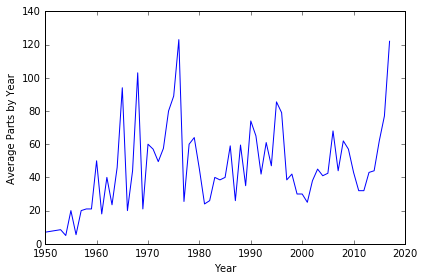

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')
# Create a summary of average number of parts by year: `parts_by_year`
unique_years = list(set(sets['year']))
parts_by_year = sets.groupby('year').median()
print(parts_by_year)

# Plot trends in average number of parts by year
plt.plot(unique_years, parts_by_year['num_parts'])
plt.xlabel('Year')
plt.ylabel('Average Parts by Year');


In [12]:
%%nose
def test_sets_exists():
    assert 'sets' in globals(), "You should read the data into a variable named `sets`"
def test_parts_by_year_exists():
    assert 'parts_by_year' in globals(), "You should have defined a variable named `parts_by_year`"

2/2 tests passed


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [13]:
# themes_by_year: Number of themes shipped by year
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

themes_year = {}

for year in sets['year']:
    if year in themes_year:
        themes_year[year] += 1
    else:
        themes_year[year] = 1
        
themes_by_year = pd.DataFrame(list(themes_year.items()), columns=['year', 'theme_id'])

print(themes_by_year)

    year  theme_id
0   1950         7
1   1953         4
2   1954        14
3   1955        28
4   1956        12
5   1957        21
6   1958        42
7   1959         4
8   1960         3
9   1961        17
10  1962        40
11  1963        18
12  1964        11
13  1965        10
14  1966        89
15  1967        21
16  1968        25
17  1969        69
18  1970        29
19  1971        45
20  1972        38
21  1973        68
22  1974        39
23  1975        31
24  1976        68
25  1977        92
26  1978        73
27  1979        82
28  1980        88
29  1981        79
..   ...       ...
36  1988        68
37  1989       114
38  1990        85
39  1991       106
40  1992       115
41  1993       111
42  1994       128
43  1995       128
44  1996       144
45  1997       194
46  1998       325
47  1999       300
48  2000       327
49  2001       339
50  2002       447
51  2003       415
52  2004       371
53  2005       330
54  2006       283
55  2007       319
56  2008    

In [14]:
%%nose
def test_themes_by_year_exists():
    assert 'themes_by_year' in globals(), "You should have defined a variable named `themes_by_year`"
def test_themes_by_year():
    assert themes_by_year.shape == (66, 2), "The DataFrame themes_by_year should contain 66 rows and 2 columns"
def test_themes_by_year_names():
    colnames = ['year', 'theme_id']
    assert all(name in themes_by_year for name in colnames), "Your DataFrame, bnames, should have columns named: year, theme_id"

3/3 tests passed


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>

In [15]:
# Nothing to do here

In [16]:
%%nose
def test_default():
  assert True

1/1 tests passed
